This is the implementation of **Relative Strength Index** (RSI).
I just made through converting the existing mathematical logi concept to programming logic which for easier manipulating.

For implenting this implementation i referred to the website
https://blog.quantinsti.com/rsi-indicator/
we can use it for better understanding.
I made this implementaion throught the SPY dataset which is from 01/Jan/23 to till current date.

SPDR S&P Exchange traded Fund.

In [ ]:
import os
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf
import plotly.express as px

In [ ]:
start = dt.datetime(2023,1,1)
end = dt.datetime.now()

In [ ]:
data = yf.download('SPY',start,end)
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,384.369995,386.429993,377.829987,380.820007,379.372131,74850700
2023-01-04,383.179993,385.880005,380.000000,383.760010,382.300964,85934100
2023-01-05,381.720001,381.839996,378.760010,379.380005,377.937592,76970500
2023-01-06,382.609985,389.250000,379.410004,388.079987,386.604492,104189600
2023-01-09,390.369995,393.700012,387.670013,387.859985,386.385345,73978100
...,...,...,...,...,...,...
2023-05-22,418.640015,420.390015,417.350006,418.790009,418.790009,60745400
2023-05-23,417.079987,418.720001,413.679993,414.089996,414.089996,86383500
2023-05-24,412.420013,412.820007,409.880005,411.089996,411.089996,89213700


In [ ]:
data.shape

(101, 6)

In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,101.000000,101.000000,101.000000,101.000000,101.000000,1.010000e+02
mean,403.617920,406.261091,401.242971,404.076238,403.309565,8.601749e+07
std,9.595635,9.141737,9.949842,9.662640,10.047257,2.447125e+07
min,381.720001,381.839996,377.829987,379.380005,377.937592,4.922010e+07
25%,396.720001,399.290009,393.559998,396.489990,395.750000,6.888110e+07
50%,405.859985,408.160004,404.010010,406.480011,405.542236,8.480030e+07
75%,411.859985,413.700012,409.470001,412.350006,411.880005,9.490190e+07
max,420.170013,420.769989,417.350006,420.019989,420.019989,1.892530e+08


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 101 entries, 2023-01-03 to 2023-05-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       101 non-null    float64
 1   High       101 non-null    float64
 2   Low        101 non-null    float64
 3   Close      101 non-null    float64
 4   Adj Close  101 non-null    float64
 5   Volume     101 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 5.5 KB


In [ ]:
df = pd.DataFrame(data)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,384.369995,386.429993,377.829987,380.820007,379.372131,74850700
2023-01-04,383.179993,385.880005,380.000000,383.760010,382.300964,85934100
2023-01-05,381.720001,381.839996,378.760010,379.380005,377.937592,76970500
2023-01-06,382.609985,389.250000,379.410004,388.079987,386.604492,104189600
2023-01-09,390.369995,393.700012,387.670013,387.859985,386.385345,73978100
...,...,...,...,...,...,...
2023-05-22,418.640015,420.390015,417.350006,418.790009,418.790009,60745400
2023-05-23,417.079987,418.720001,413.679993,414.089996,414.089996,86383500
2023-05-24,412.420013,412.820007,409.880005,411.089996,411.089996,89213700


In [ ]:
df.reset_index(inplace = True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,384.369995,386.429993,377.829987,380.820007,379.372131,74850700
1,2023-01-04,383.179993,385.880005,380.000000,383.760010,382.300964,85934100
2,2023-01-05,381.720001,381.839996,378.760010,379.380005,377.937592,76970500
3,2023-01-06,382.609985,389.250000,379.410004,388.079987,386.604492,104189600
4,2023-01-09,390.369995,393.700012,387.670013,387.859985,386.385345,73978100
...,...,...,...,...,...,...,...
96,2023-05-22,418.640015,420.390015,417.350006,418.790009,418.790009,60745400
97,2023-05-23,417.079987,418.720001,413.679993,414.089996,414.089996,86383500
98,2023-05-24,412.420013,412.820007,409.880005,411.089996,411.089996,89213700
99,2023-05-25,414.739990,416.160004,412.410004,414.649994,414.649994,90961600


In [ ]:
fig = px.line(df, x = 'Date', y = 'Close',title = 'SPY Exchange Traded Fund ETF')
display(fig)

Calculation of RSI Indicator

In [ ]:
Date_Close = {}
for i in range(len(df['Date'])):
  Date_Close[df['Date'][i]] = df['Close'][i]
Date_Close

Change in price = (Current closing price - Previous closing price) = (285.48 - 280.6) = 4.79

In [ ]:
Change = []
for i in range(1,len(df['Date'])):
  cur_value = df['Close'][i]
  prev_value = df['Close'][i-1]
  diff = cur_value - prev_value
  if(i-1 == 0):
    Change.append(0)
  Change.append(round(diff,3))
#Change

In [ ]:
Date = list(df['Date'])
Close = list(df['Close'])

In [ ]:
Gain = []
Loss = []
for i in range(len(Change)):
  if(Change[i] < 0):
    Gain.append(float(0.00))
    Loss.append(abs(Change[i]))
  elif Change[i] == 0:
    Gain.append(float(0.00))
    Loss.append(float(0.00))
  else:
    Gain.append(abs(Change[i]))
    Loss.append(float(0.00))
#Gain

(0.00 + 4.79 + 8.60 + 0.00 + 6.02 + 1.23 + 0.00 + 9.64 + 8.68 + 0.00 + 4.88 + 0.00 + 0.00 + 0.00)/14 = 3.13.
Calculating Average Gain and Average Loss

In [ ]:
Avg_gain = []
Avg_loss = []
for i in range(14):
  Avg_gain.append(0)
  Avg_loss.append(0)

for i in range(len(Gain)-14):
  sum = 0
  for j in range(i,i+14):
    sum += Gain[j]
  Avg_gain.append(round((sum/14),3))

for i in range(len(Loss)-14):
  sum = 0
  for j in range(i,i+13):
    sum += Loss[j]
  Avg_loss.append(round((sum/14),3))

Calculating the Relative Strength
RS = (Avg Gain)/(Avg Loss) = 3.13/2.52 = 1.24.

In [ ]:
RS = []
m = len(Avg_gain)
for i in range(m):
  if Avg_gain[i] == 0 and Avg_loss[i] == 0:
    RS.append(0)
  elif Avg_loss[i] == 0:
    RS.append(0)
  else:
    k = Avg_gain[i] / Avg_loss[i]
    RS.append(round(k,3))
#RS

Calculating Relative Strength Index
RSI = [100 - (100/{1+ RS})]

In [ ]:
RSI = []
for i in range(len(RS)):
  if RS[i] == 0:
    RSI.append(0)
  elif RS[i] != 0:
    p = 1 + RS[i]
    q = 100/p
    R = 100 - q
    RSI.append(round(q,3))
#RSI

In [ ]:
print("len_Date:",len(Date))
print("len_Close:",len(Close))
print("len_Gain:",len(Gain))
print("len_Loss:",len(Loss))
print("len_Avg_Gain:",len(Avg_gain))
print("len_Avg_Loss:",len(Avg_loss))
print("len_RS:",len(RS))

len_Date: 101
len_Close: 101
len_Gain: 101
len_Loss: 101
len_Avg_Gain: 101
len_Avg_Loss: 101
len_RS: 101


In [ ]:
Dict = {'Date': Date,'Close': Close,'Gain': Gain,'Loss': Loss,'Avg_Gain':Avg_gain,'Avg_loss':Avg_loss,'RS':RS,'RSI':RSI}
Data_Frame = pd.DataFrame(Dict)
Data_Frame.head(60)

,Date,Close,Gain,Loss,Avg_Gain,Avg_loss,RS,RSI
0,2023-01-03,380.820007,0.00,0.00,0.000,0.000,0.000,0.000
1,2023-01-04,383.760010,2.94,0.00,0.000,0.000,0.000,0.000
2,2023-01-05,379.380005,0.00,4.38,0.000,0.000,0.000,0.000
3,2023-01-06,388.079987,8.70,0.00,0.000,0.000,0.000,0.000
4,2023-01-09,387.859985,0.00,0.22,0.000,0.000,0.000,0.000
5,2023-01-10,390.579987,2.72,0.00,0.000,0.000,0.000,0.000
6,2023-01-11,395.519989,4.94,0.00,0.000,0.000,0.000,0.000
7,2023-01-12,396.959991,1.44,0.00,0.000,0.000,0.000,0.000
8,2023-01-13,398.500000,1.54,0.00,0.000,0.000,0.000,0.000
9,2023-01-17,397.769989,0.00,0.73,0.000,0.000,0.000,0.000


In [ ]:
fig = px.line(Data_Frame, x = 'Date', y = 'Close',title = 'SPY Exchange Traded Fund ETF')
display(fig)

In [ ]:
overbought = 70
oversold = 30

In [ ]:
fig_RSI = px.line(Data_Frame, x = 'Date', y = 'RSI',title = 'RSI Indicator')
fig_RSI.add_hline(y=overbought,opacity = 0.5)
fig_RSI.add_hline(y=oversold,opacity = 0.5)
display(fig_RSI)


Calculation of ATR

In [ ]:
atr_period = 14
df['range'] = df['High'] - df['Low']
df['ATR_14'] = df['range'].rolling(14).mean()
df

,Date,Open,High,Low,Close,Adj Close,Volume,range,ATR_14
0,2023-01-03,384.369995,386.429993,377.829987,380.820007,379.372131,74850700,8.600006,NaN
1,2023-01-04,383.179993,385.880005,380.000000,383.760010,382.300964,85934100,5.880005,NaN
2,2023-01-05,381.720001,381.839996,378.760010,379.380005,377.937592,76970500,3.079987,NaN
3,2023-01-06,382.609985,389.250000,379.410004,388.079987,386.604492,104189600,9.839996,NaN
4,2023-01-09,390.369995,393.700012,387.670013,387.859985,386.385345,73978100,6.029999,NaN
...,...,...,...,...,...,...,...,...,...
96,2023-05-22,418.640015,420.390015,417.350006,418.790009,418.790009,60745400,3.040009,3.798569
97,2023-05-23,417.079987,418.720001,413.679993,414.089996,414.089996,86383500,5.040009,3.722855
98,2023-05-24,412.420013,412.820007,409.880005,411.089996,411.089996,89213700,2.940002,3.680712
99,2023-05-25,414.739990,416.160004,412.410004,414.649994,414.649994,90961600,3.750000,3.585713


In [ ]:
df[['Date','ATR_14']]

,Date,ATR_14
0,2023-01-03,NaN
1,2023-01-04,NaN
2,2023-01-05,NaN
3,2023-01-06,NaN
4,2023-01-09,NaN
...,...,...
96,2023-05-22,3.798569
97,2023-05-23,3.722855
98,2023-05-24,3.680712
99,2023-05-25,3.585713


In [ ]:
fig_atr = px.line(df,x = 'Date',y = 'ATR_14',title = 'ATR INDICATOR')
fig_atr

MACD

In [ ]:
def MACD(df):
  df['EMA12'] = df.Close.ewm(span = 12).mean()
  df['EMA26'] = df.Close.ewm(span = 26).mean()
  df['MACD'] = df.EMA12 - df.EMA26
  df['Signal'] = df.MACD.ewm(span = 9).mean()
  print('Indicator Added')

In [ ]:
MACD(df)

Indicator Added


In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,range,ATR_14,EMA12,EMA26,MACD,Signal
0,2023-01-03,384.369995,386.429993,377.829987,380.820007,379.372131,74850700,8.600006,NaN,380.820007,380.820007,0.000000,0.000000
1,2023-01-04,383.179993,385.880005,380.000000,383.760010,382.300964,85934100,5.880005,NaN,382.412509,382.346547,0.065962,0.036645
2,2023-01-05,381.720001,381.839996,378.760010,379.380005,377.937592,76970500,3.079987,NaN,381.228922,381.280697,-0.051776,0.000407
3,2023-01-06,382.609985,389.250000,379.410004,388.079987,386.604492,104189600,9.839996,NaN,383.391535,383.181481,0.210054,0.071426
4,2023-01-09,390.369995,393.700012,387.670013,387.859985,386.385345,73978100,6.029999,NaN,384.605597,384.266446,0.339151,0.151068
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2023-05-22,418.640015,420.390015,417.350006,418.790009,418.790009,60745400,3.040009,3.798569,414.682881,412.206593,2.476289,1.933298
97,2023-05-23,417.079987,418.720001,413.679993,414.089996,414.089996,86383500,5.040009,3.722855,414.591668,412.346178,2.245490,1.995736
98,2023-05-24,412.420013,412.820007,409.880005,411.089996,411.089996,89213700,2.940002,3.680712,414.052949,412.253082,1.799867,1.956562
99,2023-05-25,414.739990,416.160004,412.410004,414.649994,414.649994,90961600,3.750000,3.585713,414.144802,412.430712,1.714091,1.908068


In [ ]:
fig_Signal = px.line(df,x = 'Date',y = 'Signal',title = 'MACD INDICATOR')
fig_MACD = px.line(df,x = 'Date',y = 'MACD',title = 'MACD INDICATOR')

In [ ]:
display(fig_Signal)

In [ ]:
display(fig_MACD)

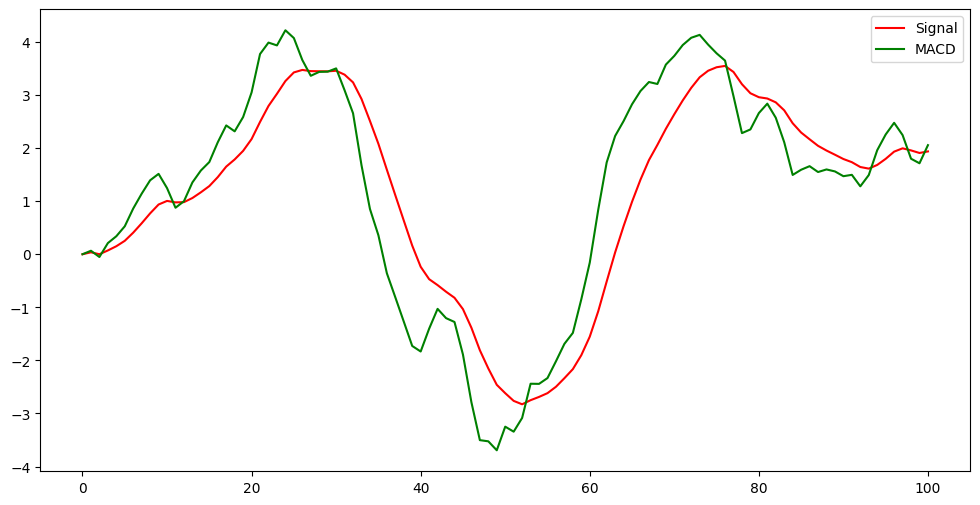

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Signal, label = 'Signal', color = 'red')
plt.plot(df.MACD, label = 'MACD', color = 'green')
plt.legend()
plt.show()

In [ ]:
Buy,Sell = [],[]
for i in range(2,len(df)):
  print(df.MACD.iloc[i])
  if df.MACD.iloc[i] > df.Signal.iloc[i] and df.MACD.iloc[i-1] < df.Signal.iloc[i-1]:
    Buy.append(i)
  elif df.MACD.iloc[i] < df.Signal.iloc[i] and df.MACD.iloc[i-1] > df.Signal.iloc[i-1]:
    Sell.append(i)

In [ ]:
Buy

[3, 12, 30, 53, 94, 100]

In [ ]:
Sell

[2, 11, 27, 31, 77, 98]

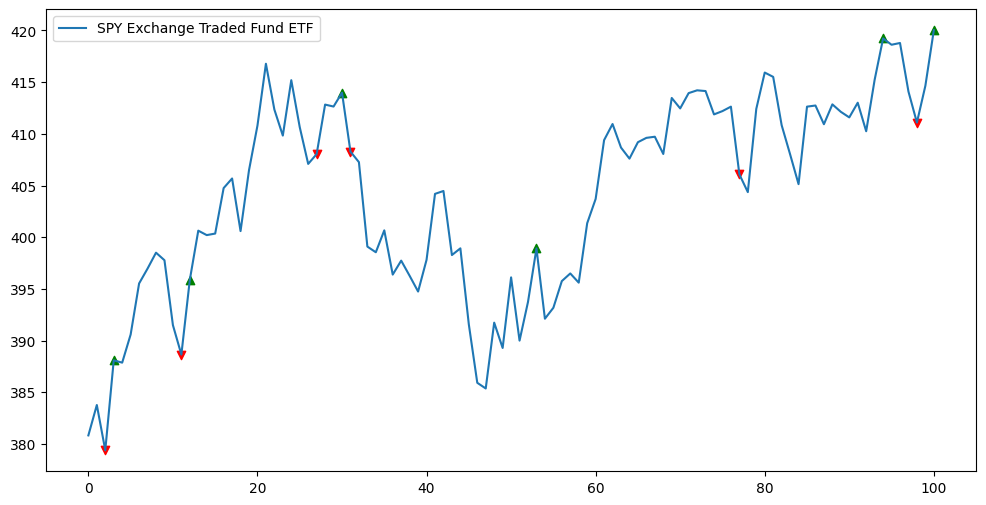

In [ ]:
 plt.figure(figsize = (12,6))
plt.scatter(df.iloc[Buy].index, df.iloc[Buy].Close,marker = '^', color='green')
plt.scatter(df.iloc[Sell].index, df.iloc[Sell].Close,marker = 'v', color='red')
plt.plot(df.Close, label = 'SPY Exchange Traded Fund ETF')
plt.legend()
plt.show()